In [15]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.preprocessing import StandardScaler
import stockcorr as sc
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('../data/stock_market_data/stockdf.csv')


In [6]:
tickers = df.drop(columns='Date').columns
print(tickers)
print(len(df[df['AAPL'] > 0]))
print(len(df[df['AAC'] > 0]))
print(df.shape)

# removing all tickers with less than 7 years of prices
lengt_of_business_year = len(df[df['Date'] < '2011-01-04'])
list_low_data = []

for i in tickers:
    if len(df[i]) - len(df[i].isnull()) < 7*lengt_of_business_year:
        list_low_data.append(i)

print(len(list_low_data))

Index(['A', 'AAC', 'AAL', 'AAP', 'AAPL', 'AAT', 'ABBV', 'ABC', 'ABM', 'ABMD',
       ...
       'XOM', 'XPO', 'XYL', 'YUM', 'ZBH', 'ZDPY', 'ZION', 'ZNH', 'ZOES',
       'ZTS'],
      dtype='object', length=919)
3225
400
(3226, 920)
919


In [45]:
print(list_low_data)
x = df.drop(columns=list_low_data)
print(len(x.columns))

['AAC', 'ADPT', 'AHL', 'AI', 'ALTR', 'AMTD', 'APL', 'BALT', 'BGC', 'BHI', 'BIN', 'BNJ', 'BNK', 'BPK', 'BRP', 'BTF', 'BTU', 'CBL', 'CCZ', 'CRC', 'CTQ', 'DV', 'EE', 'FRMC', 'GCH', 'GLF', 'GNI', 'GRR', 'HOT', 'HPE', 'HTZ', 'ICB', 'IR', 'MBLY', 'MEG', 'MIG', 'MZF', 'NBD', 'NE', 'NSM', 'NYRT', 'OB', 'PAY', 'PGEM', 'PT', 'ROC', 'RSPP', 'SMI', 'TIME', 'TVPT', 'TW', 'UA', 'VR', 'ZOES']
866


In [98]:
##data_ = np.array([np.std(x[ticker]) for ticker in x.drop(columns=['Date']).columns]).reshape(1, len(x.drop(columns=['Date']).columns))
## Standardize each ticker in x
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(x.drop(columns=['Date'])))


std_ = np.std(df, axis=0)

# Get the standardised mean and standard deviation of the data in x
# std_ = np.array([np.std((x[ticker] - np.mean(x[ticker])/np.std(x[ticker]))) for ticker in x.drop(columns=['Date']).columns]).reshape(1, len(x.drop(columns=['Date']).columns))


## find json file named COMP.json



FileNotFoundError: [Errno 2] No such file or directory: 'data/stock_market_data/{i}/json/'

In [24]:
x = pd.read_csv('../data/stock_market_data/stockdf.csv')
## make date column into datetime
x['Date'] = pd.to_datetime(x['Date'])
hist_data = pd.read_csv('../data/stock_market_data/HistoricalData_1667914714805.csv')
hist_data['Date'] = pd.to_datetime(hist_data['Date'])

## close price in hist data to x with column name 'COMP'
x = pd.merge(hist_data['Close/Last'],x, left_on = hist_data['Date'], right_on=x['Date']).rename(columns={'Close/Last':'COMP'})
x.tail()



x = x.drop(columns=['key_0'])

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

x = swap_columns(x, 'COMP', 'Date')

x = x.set_index('Date')

x.head()






,COMP,A,AAC,AAL,AAP,AAPL,AAT,ABBV,ABC,ABM,...,XOM,XPO,XYL,YUM,ZBH,ZDPY,ZION,ZNH,ZOES,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-26,10970.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-24,10952.61,132.375000,9.960,13.9325,174.917503,148.455002,26.430000,150.990005,150.000000,42.400002,...,106.379997,47.044998,95.660004,108.680000,108.419998,0.695,49.520000,26.063900,NaN,150.005005
2022-10-21,10859.72,129.880005,9.960,13.7100,171.339996,147.270004,26.250000,147.059998,147.729996,41.820000,...,105.860001,45.750000,93.860001,111.029999,107.389999,0.710,47.820000,28.559999,NaN,147.210007
2022-10-20,10614.84,125.940002,9.945,13.4600,170.279999,143.389999,25.830000,142.929993,142.770004,40.959999,...,103.930000,44.889999,91.040001,109.660004,106.330002,0.700,47.130001,27.530001,NaN,144.429993
2022-10-19,10680.51,128.960007,9.950,13.9900,171.250000,143.860001,25.620001,143.130005,142.990005,41.500000,...,103.790001,45.250000,92.900002,110.449997,108.120003,0.659,49.220001,26.570000,NaN,148.130005


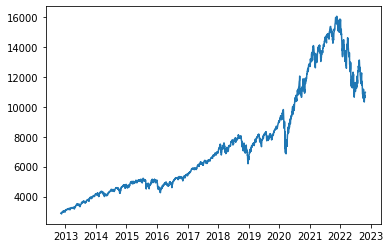

In [25]:
# reverse the row order of x
x = x.iloc[::-1]
x
plt.plot(x['COMP'])
plt.show()